## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
import warnings  #Remove unnecessary warnings
warnings.filterwarnings('ignore')

## Cargar data

In [3]:
df = pd.read_csv('archive (1)/Credit Card Customer Data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [11]:
df.describe().style.background_gradient(cmap='Oranges')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [15]:
df.isnull().sum()


Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [17]:
df.duplicated().any()

False

## Analisis

Eliminado una columna index 

In [19]:
df.drop(columns='Sl_No',axis=1,inplace=True)

### Analisis de todos los datos

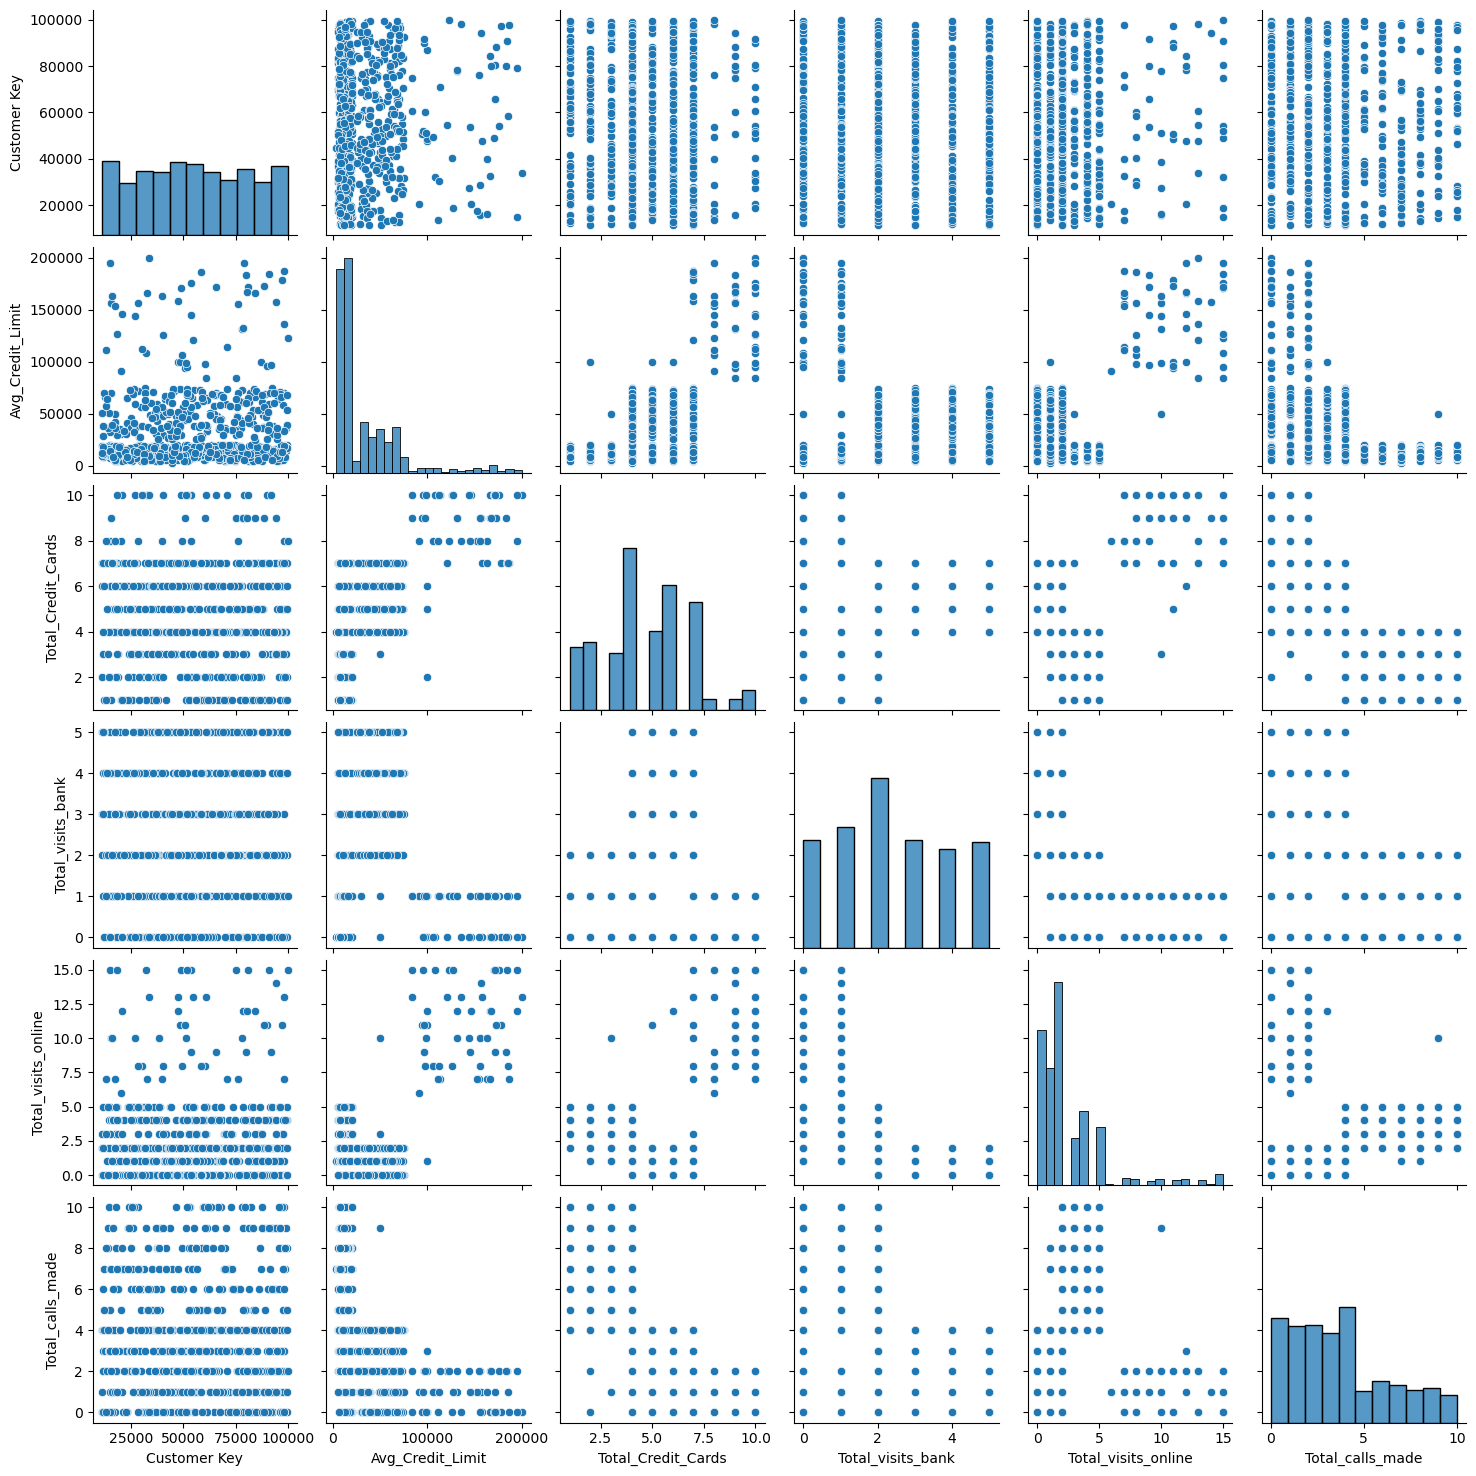

In [21]:
sns.pairplot(df)

### agregando nuevas variables 

Esta nueva columna nos explica la cantidad de credito usado por cliente entre la cantidad de productos 

In [22]:
df['Credit_Utilization_Ratio'] = df['Avg_Credit_Limit'] / df['Total_Credit_Cards']

Esta columna nos ayuda a saber la cantidad de contacto que tuvo el cliente con el banco

In [23]:
df['Interaction_Score'] = df['Total_visits_bank'] + df['Total_visits_online'] + df['Total_calls_made']

In [24]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score
0,87073,100000,2,1,1,0,50000.000000,2
1,38414,50000,3,0,10,9,16666.666667,19
2,17341,50000,7,1,3,4,7142.857143,8
3,40496,30000,5,1,1,4,6000.000000,6
4,47437,100000,6,0,12,3,16666.666667,15


### Buscando correlacion entre las variables 

<Axes: >

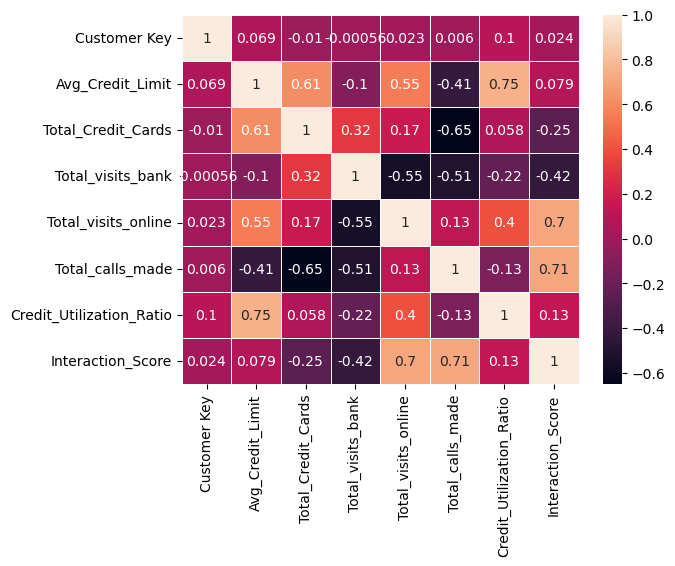

In [33]:
sns.heatmap(
    data= df.corr(),
    annot= True,
    # cmap='coolwarn',
    linewidths=0.5
    )

## Outliners

In [34]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score
0,87073,100000,2,1,1,0,50000.000000,2
1,38414,50000,3,0,10,9,16666.666667,19
2,17341,50000,7,1,3,4,7142.857143,8
3,40496,30000,5,1,1,4,6000.000000,6
4,47437,100000,6,0,12,3,16666.666667,15


<Axes: xlabel='Avg_Credit_Limit'>

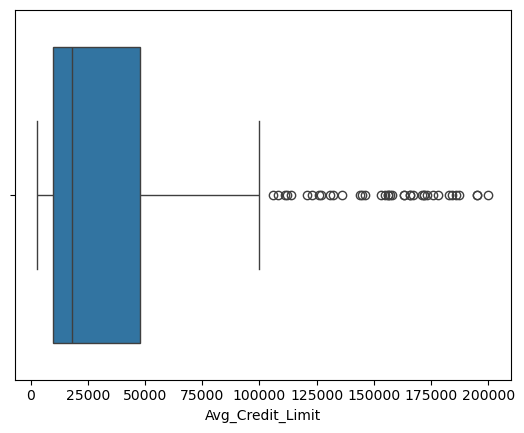

In [35]:
sns.boxplot(
    data= df,
    x= 'Avg_Credit_Limit'
)

<Axes: xlabel='Total_Credit_Cards'>

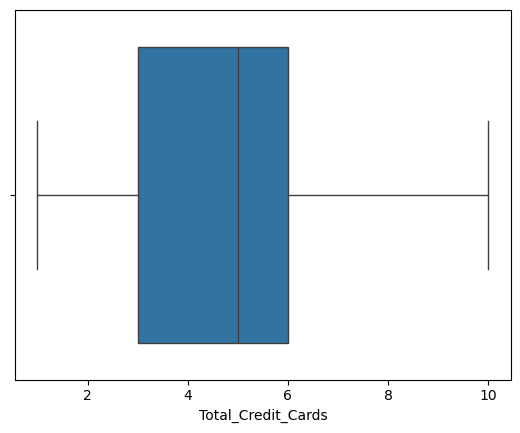

In [36]:
sns.boxplot(
    data= df,
    x= 'Total_Credit_Cards'
)

<Axes: xlabel='Total_visits_online'>

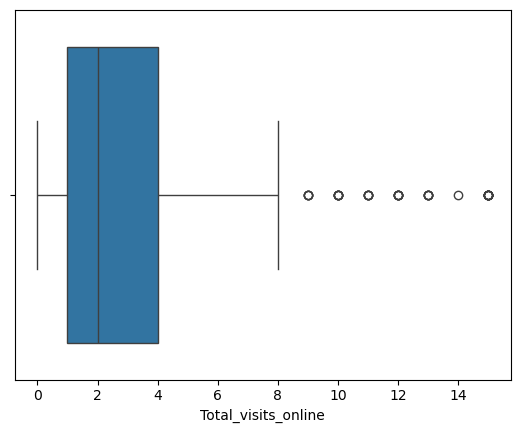

In [37]:
sns.boxplot(
    data= df,
    x= 'Total_visits_online'
)

<Axes: xlabel='Total_calls_made'>

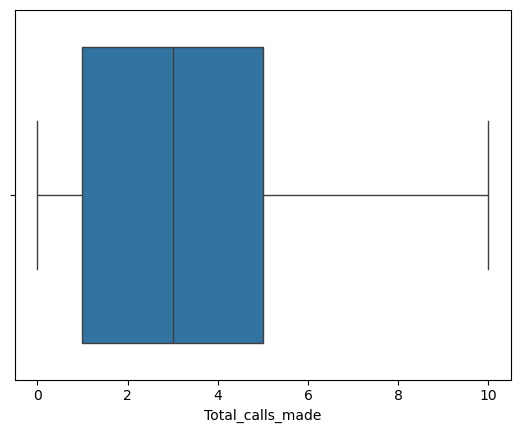

In [38]:
sns.boxplot(
    data= df,
    x= 'Total_calls_made'
)

<Axes: xlabel='Total_visits_bank'>

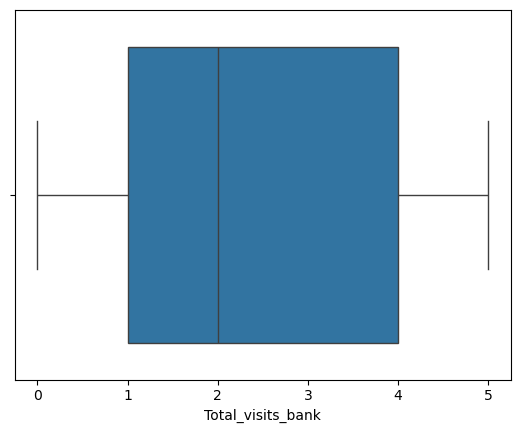

In [39]:
	
sns.boxplot(
    data= df,
    x= 'Total_visits_bank'
)

Validando los outlier vamos que tenemos 2 columnas con una gran cantidad de los mismos que son: Total_visits_online, Avg_Credit_Limit 

In [40]:
def handle_outliers(data, column_name, action='remove'):
    """
    Identifica y maneja los outliers en una columna de un DataFrame usando el IQR.

    Parámetros:
    - data (pd.DataFrame): DataFrame que contiene los datos.
    - column_name (str): Nombre de la columna en la que se buscarán outliers.
    - action (str): Acción a realizar con los outliers. Puede ser 'remove' para eliminarlos o 'cap' para limitarlos al IQR.

    Retorna:
    - pd.DataFrame: DataFrame con outliers manejados según la acción especificada.
    """
    # Calcular el IQR
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if action == 'remove':
        # Eliminar outliers
        data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    elif action == 'cap':
        # Limitar valores atípicos al IQR
        data[column_name] = data[column_name].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    else:
        print("Acción no reconocida. Por favor usa 'remove' o 'cap'.")

    return data



In [44]:
df = handle_outliers(df, 'Total_visits_online')
df = handle_outliers(df, 'Avg_Credit_Limit')

Hemos optenido un df reducido eliminado los valores atipicos 

In [45]:
df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score
2,17341,50000,7,1,3,4,7142.857143,8
3,40496,30000,5,1,1,4,6000.000000,6
5,58634,20000,3,0,1,8,6666.666667,9
7,37376,15000,3,0,1,1,5000.000000,2
8,82490,5000,2,0,2,2,2500.000000,4
...,...,...,...,...,...,...,...,...
607,90191,34000,6,3,1,0,5666.666667,4
608,49341,47000,4,4,1,0,11750.000000,5
609,11562,38000,4,3,2,0,9500.000000,5
610,16253,39000,7,2,1,0,5571.428571,3


<Axes: xlabel='Total_visits_online'>

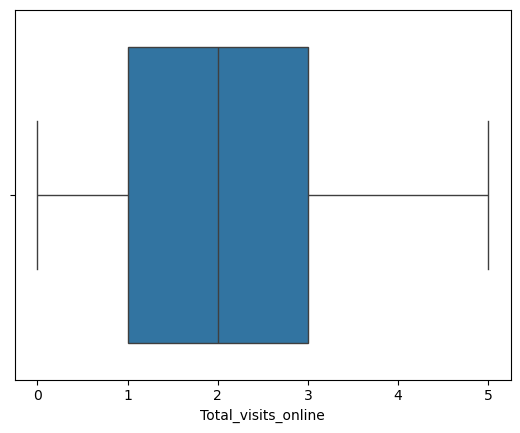

In [46]:
sns.boxplot(
    data= df,
    x= 'Total_visits_online'
)

<Axes: xlabel='Avg_Credit_Limit'>

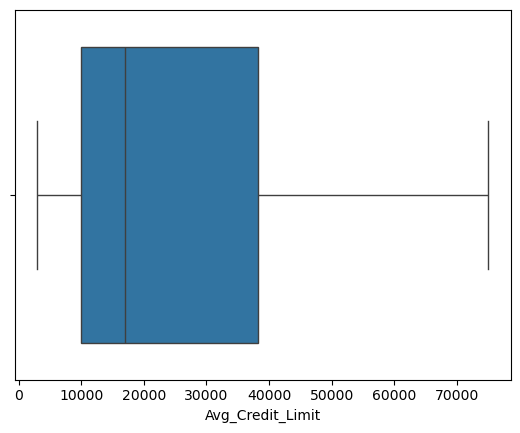

In [47]:
sns.boxplot(
    data= df,
    x= 'Avg_Credit_Limit'
)

### Modelo K-means

In [48]:
df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score
2,17341,50000,7,1,3,4,7142.857143,8
3,40496,30000,5,1,1,4,6000.000000,6
5,58634,20000,3,0,1,8,6666.666667,9
7,37376,15000,3,0,1,1,5000.000000,2
8,82490,5000,2,0,2,2,2500.000000,4
...,...,...,...,...,...,...,...,...
607,90191,34000,6,3,1,0,5666.666667,4
608,49341,47000,4,4,1,0,11750.000000,5
609,11562,38000,4,3,2,0,9500.000000,5
610,16253,39000,7,2,1,0,5571.428571,3


In [49]:
from sklearn.preprocessing import StandardScaler

Filtrando las columnas que vamos a utilizar para el modelo

In [61]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df)

In [62]:
df_scaler

array([[-1.47507827,  1.18619745,  1.39912055, ...,  0.07461831,
         0.18208229, -0.08088651],
       [-0.56781211,  0.21047121,  0.33044556, ...,  0.07461831,
        -0.07868755, -0.70737053],
       [ 0.14287645, -0.27739191, -0.73822944, ...,  1.47055467,
         0.07342819,  0.2323555 ],
       ...,
       [-1.70151278,  0.60076171, -0.20389194, ..., -1.32131806,
         0.7199201 , -1.02061254],
       [-1.51770861,  0.64954802,  1.39912055, ..., -1.32131806,
        -0.17647624, -1.64709656],
       [ 1.00445605,  0.9910522 ,  1.39912055, ..., -0.27436578,
         0.05169737, -0.08088651]])

## PCA para clustering

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA()

In [82]:
pca.fit(df_scaler)
pca_data_scaler = pca.transform(df_scaler)
pca_data_scaler

array([[-2.67337425e-01,  3.57598014e-01,  1.59889208e+00, ...,
        -6.59604503e-01,  1.25609544e-01, -3.95068060e-16],
       [-3.63448166e-01, -6.26496180e-02,  6.24418634e-01, ...,
         4.74225390e-01,  1.39685244e-02,  1.62335027e-17],
       [ 1.50617350e+00,  3.46210568e-01, -4.46788234e-02, ...,
         1.46181349e+00, -6.92333731e-02,  2.49580061e-16],
       ...,
       [-1.24308947e+00,  4.08690192e-01,  1.88622264e+00, ...,
        -8.54130615e-01, -1.08003914e-01, -2.83403689e-16],
       [-2.21846388e+00, -5.08432245e-01,  1.53068814e+00, ...,
        -5.05756954e-01,  1.57864245e-01,  4.09909854e-17],
       [-1.64148827e+00,  3.77863940e-01, -9.96094399e-01, ...,
         8.66909035e-02,  7.07774336e-02, -1.79962349e-16]])

In [83]:
var = pca.explained_variance_ratio_
var

array([4.82110509e-01, 2.01608421e-01, 1.21585276e-01, 8.63831265e-02,
       5.54578746e-02, 4.43631912e-02, 8.49160135e-03, 1.51936546e-32])

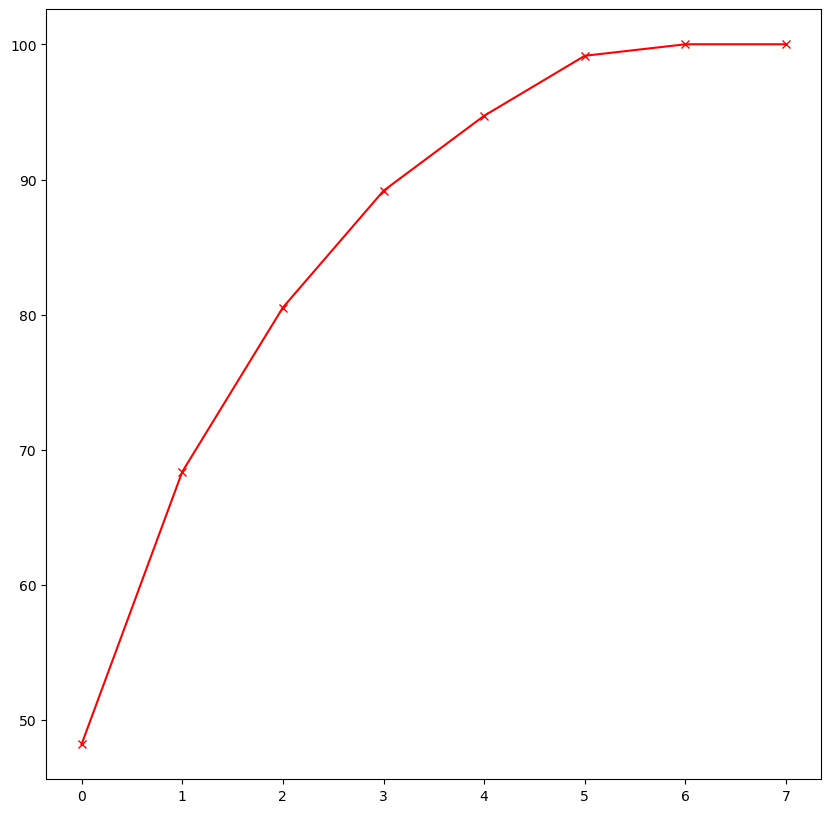

In [84]:
cum_var = np.cumsum(np.round(var,decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var,'r-x')
plt.show()

Lo que hemos optenido con esta reduccion de dimencionalidad es Mediante el PCA reducir a las columnas que aportan mas valor a nuestro modelo y solo tomar eso fetures

In [85]:
pca_df_scaler = pd.DataFrame(data= pca_data_scaler)
pca_df_scaler.drop([4,5,6,7],axis= 1,inplace=True)

### Aplicando el modelo

In [86]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score 
from scipy.cluster.hierarchy import dendrogram, linkage

In [87]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_df_scaler)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_df_scaler,y))

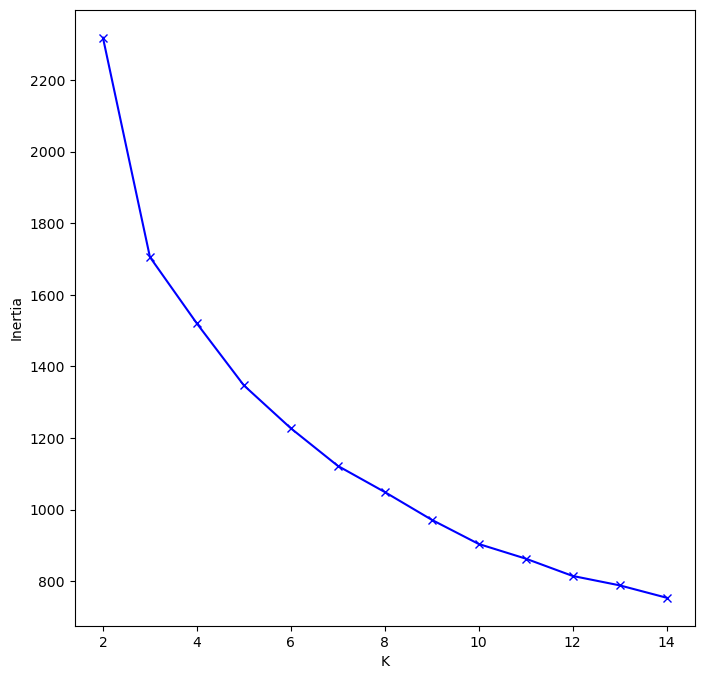

In [88]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()


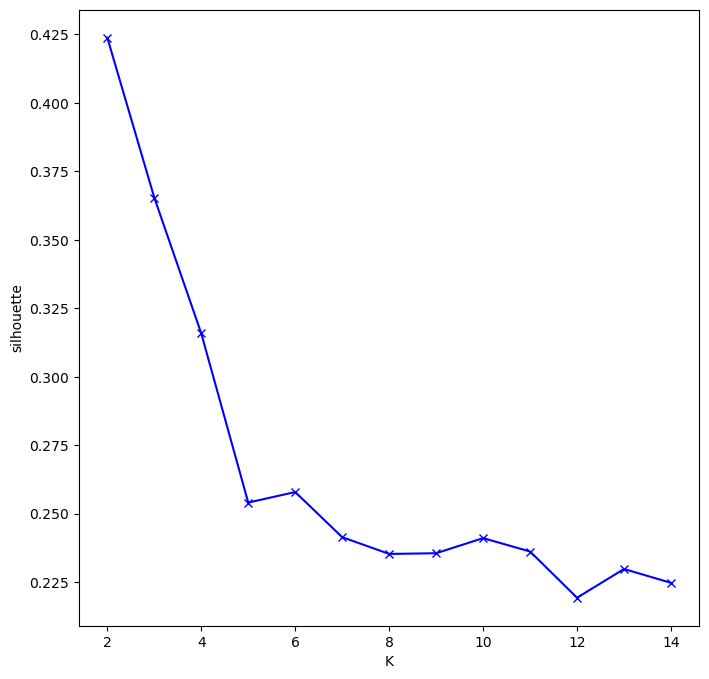

In [89]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('silhouette')
plt.show()


In [91]:
km = KMeans(n_clusters=5)
y = km.fit_predict(pca_df_scaler)
print(silhouette_score(pca_df_scaler,y))
df['Mk_resul'] = y

0.2543211590735427


In [92]:
df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score,Mk_resul
2,17341,50000,7,1,3,4,7142.857143,8,2
3,40496,30000,5,1,1,4,6000.000000,6,2
5,58634,20000,3,0,1,8,6666.666667,9,4
7,37376,15000,3,0,1,1,5000.000000,2,2
8,82490,5000,2,0,2,2,2500.000000,4,3
...,...,...,...,...,...,...,...,...,...
607,90191,34000,6,3,1,0,5666.666667,4,3
608,49341,47000,4,4,1,0,11750.000000,5,0
609,11562,38000,4,3,2,0,9500.000000,5,2
610,16253,39000,7,2,1,0,5571.428571,3,2


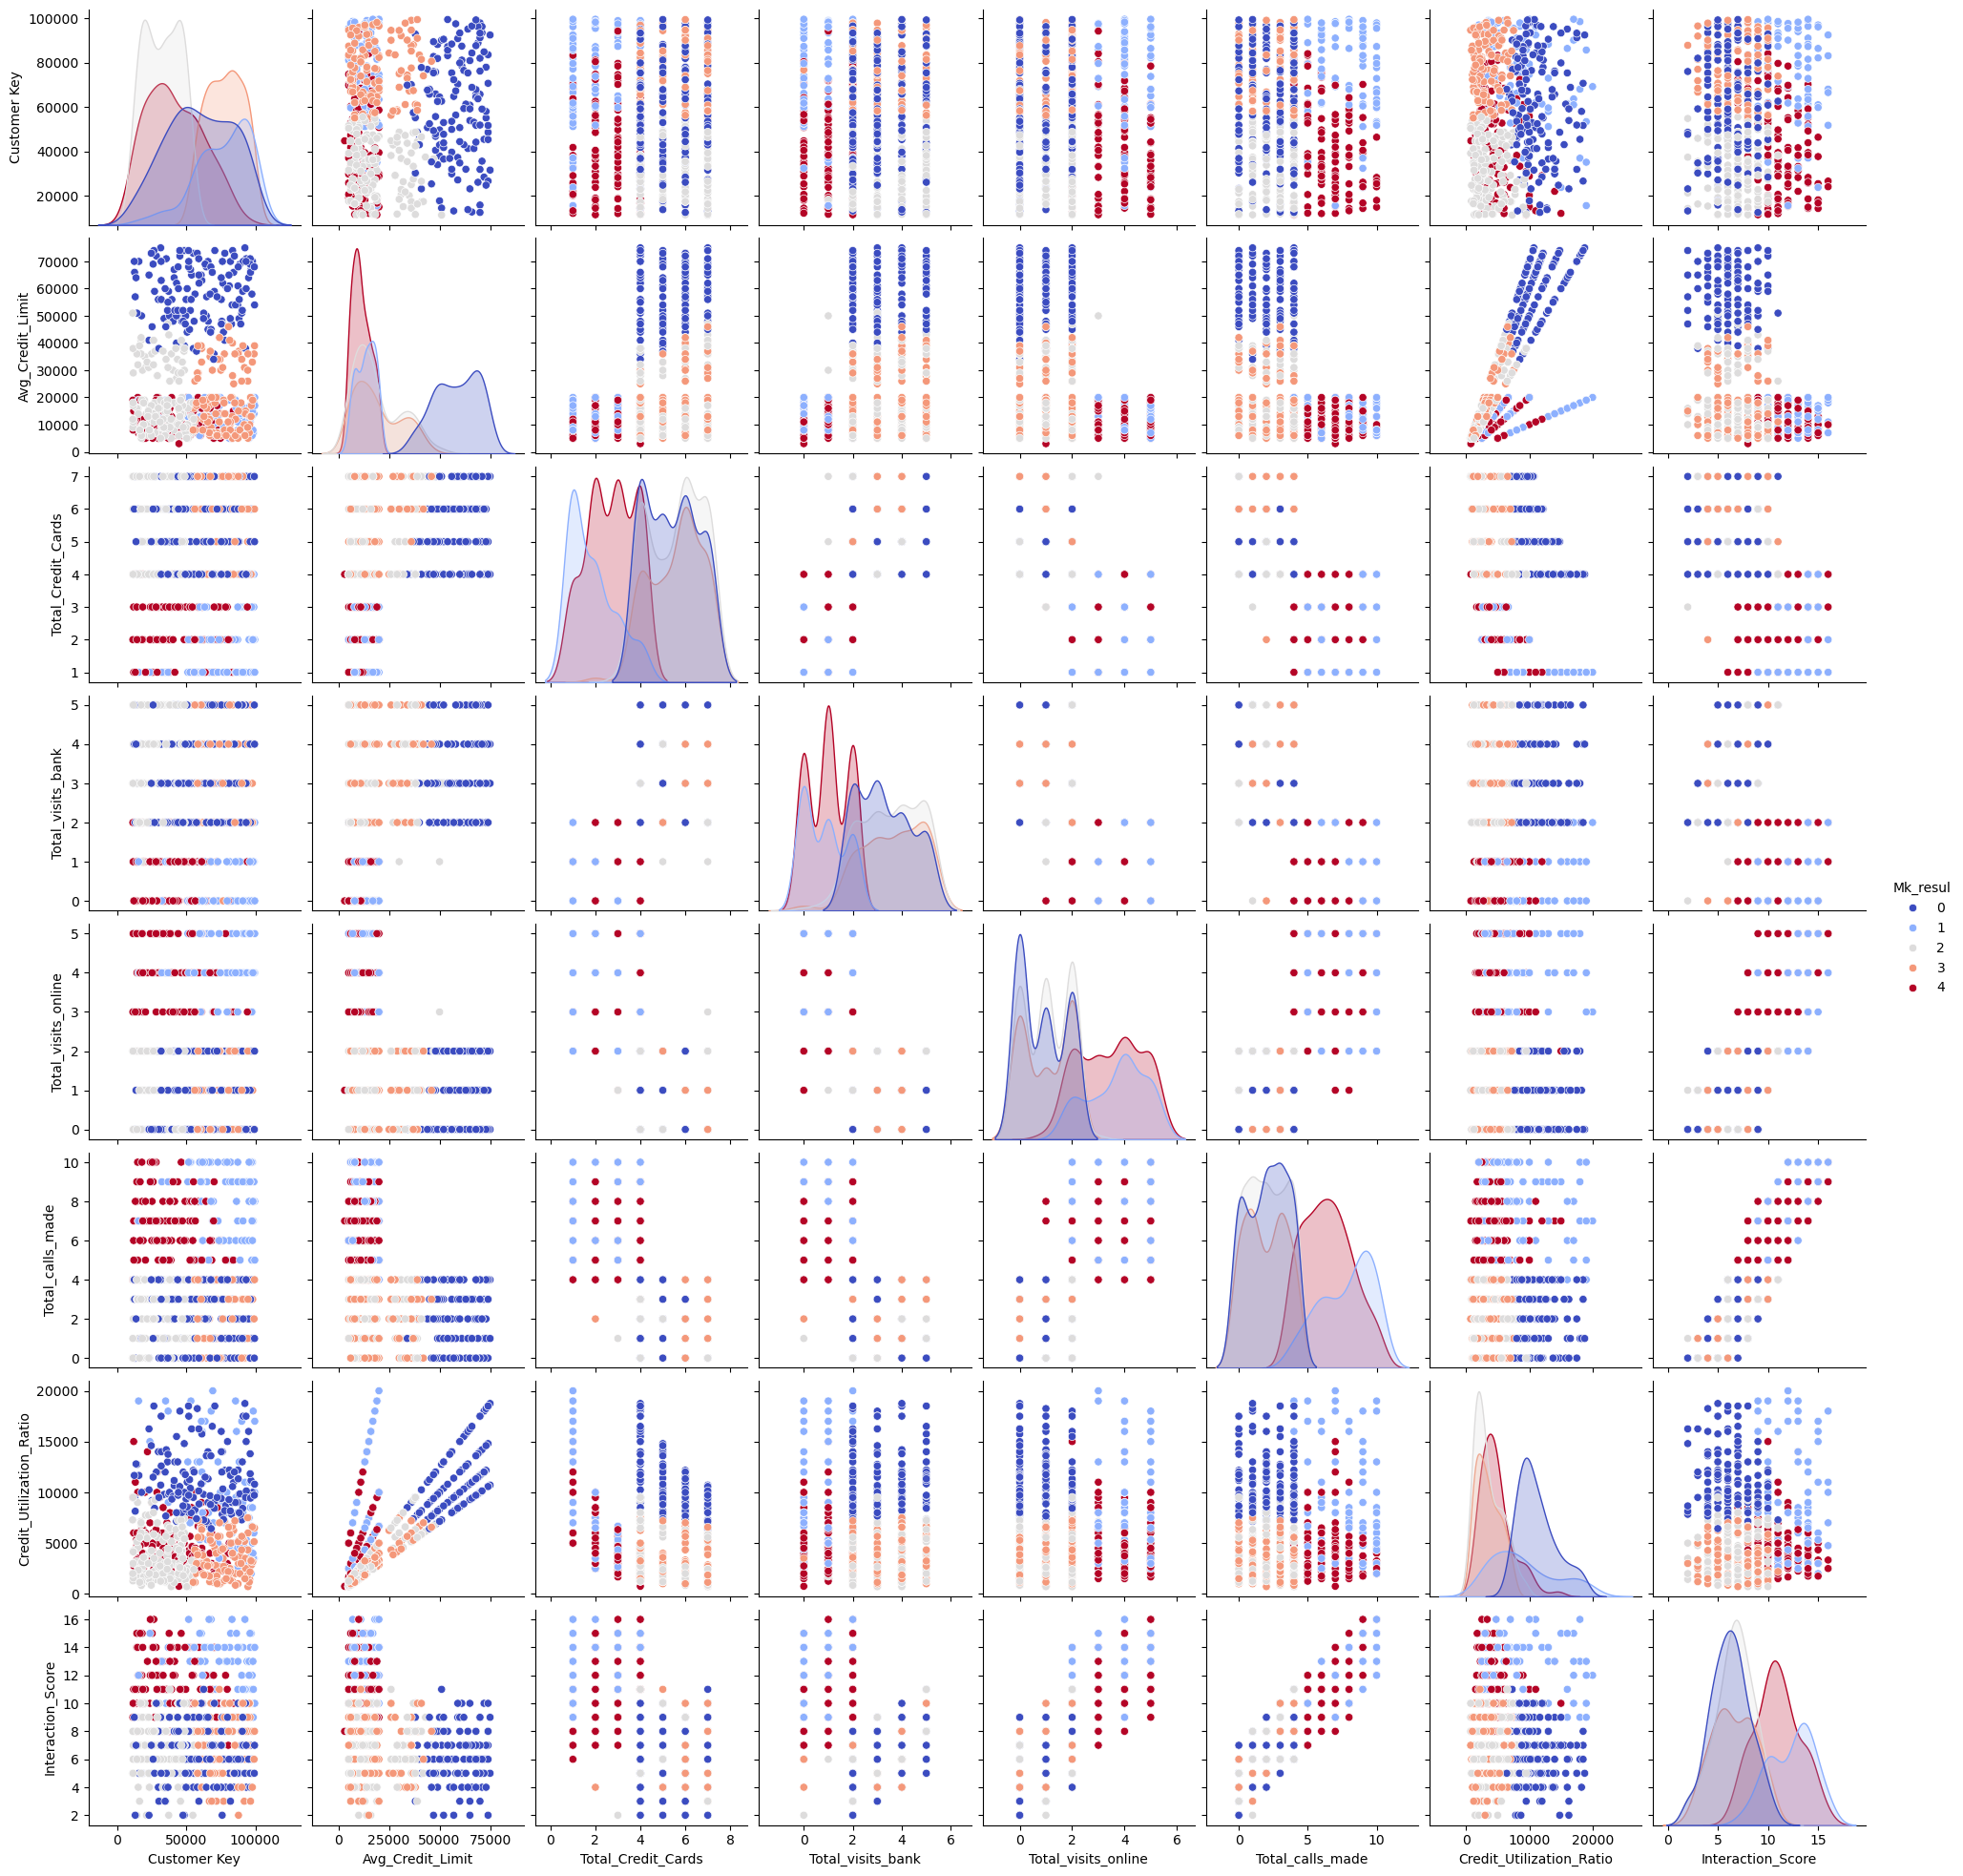

In [96]:
sns.pairplot(
    data= df,hue='Mk_resul',
    palette='coolwarm'
)

In [97]:
df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score,Mk_resul
2,17341,50000,7,1,3,4,7142.857143,8,2
3,40496,30000,5,1,1,4,6000.000000,6,2
5,58634,20000,3,0,1,8,6666.666667,9,4
7,37376,15000,3,0,1,1,5000.000000,2,2
8,82490,5000,2,0,2,2,2500.000000,4,3
...,...,...,...,...,...,...,...,...,...
607,90191,34000,6,3,1,0,5666.666667,4,3
608,49341,47000,4,4,1,0,11750.000000,5,0
609,11562,38000,4,3,2,0,9500.000000,5,2
610,16253,39000,7,2,1,0,5571.428571,3,2
